In [1]:
from SimulatedAnnealing import Annealer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

# Simulated Annealing Overview

The Simulated Annealing Algorithm provides a gradient free way of approximating the minimum of a function. It has been proposed as an alternative to gradient descent which is less prone to getting stuck in local minima - its probabalistic nature gives it the ability to escape such situations. The steps are as follows:

1. Generate and initial candidate solution $x_0$ to the problem $\min f(x)$ and calculate the initial energy $f(x_0)$. Initialise the temperature at $T_{\text{max}}$
2. Whilst both the energy and temperature are greater than some thresholds $E_{\text{min}}$, $T_{\text{min}}$, generate a new candidate solution $x_{\text{new}}$ and calculate the energy $E_{\text{new}} = f(x_{\text{new}})$. Calculate the change in energy ​$\Delta E = E_{\text{new}} - E$.
3. Probabilistically accept the pair ($\Delta E$, T), with a rate which improves as $\Delta E$ and $T$ get smaller. If we do not accept the pair, cool the temperature by setting $T \gets \alpha * T$ for some $\alpha \in (0, 1)$ called the cooling rate, and go back to step 2.
4. Output the final solution $x$ upon passing through step 3 (hopefully close to a global minimum of $f$)​.

## Annealing on a Continuous Function

We will attempt to find the minimum of a simple continuous function $f(x, y) = x^2 + y^2$ with no local minima.

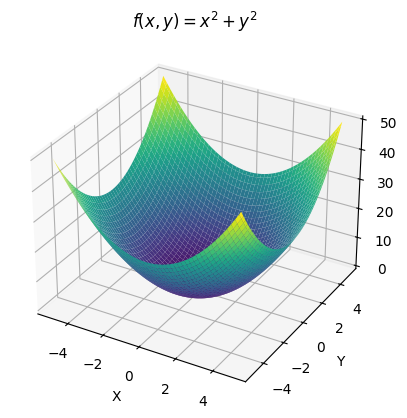

In [3]:
# Plot f(x, y) = x^2 + y^2
def f(x):
    return sum([i ** 2 for i in x])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.array([f(np.array([x[i, j], y[i, j]])) for i in range(x.shape[0]) for j in range(x.shape[1])])
z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("$f(x, y) = x^2 + y^2$")

plt.show()

We initialise the annealer, and run it with `alpha`$=0.995$. The temperature decay can be viewed with the `.plot_schedule()` method.

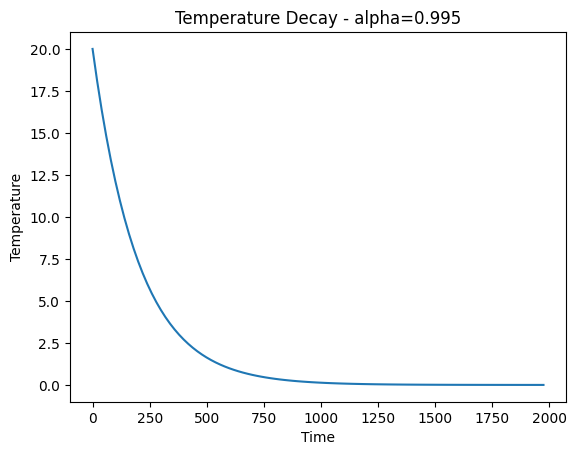

In [28]:
ann = Annealer(alpha=0.995)
ann.plot_schedule()

Next, the annealer is run using `.anneal` with inputs our function $f$ and an initial guess of $(-1, 3)$.

Estimate: [-0.03047224  0.00814576]
Energy: 0.000994911032434017


Text(0.5, 1.0, 'Value of $f(x, y) = x^2 + y^2$ at Each Annealing Iteration')

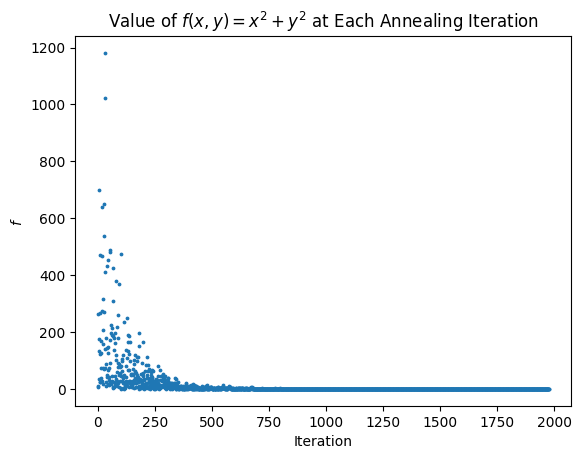

In [53]:
solution, guesses, energies = ann.anneal(f, np.array([-1, 3]))
print(f"Estimate: {solution}\nEnergy: {energies[-1]}")
plt.scatter(np.arange(len(energies)), energies, s=3.0)
plt.xlabel("Iteration")
plt.ylabel("$f$")
plt.title("Value of $f(x, y) = x^2 + y^2$ at Each Annealing Iteration")

We can visualise the last $400$ guesses, colouring them lighter for later iterations.

/var/folders/8n/1lsng3052fb68wxmq2r34tw80000gn/T/ipykernel_79020/2194987993.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Oranges_r')


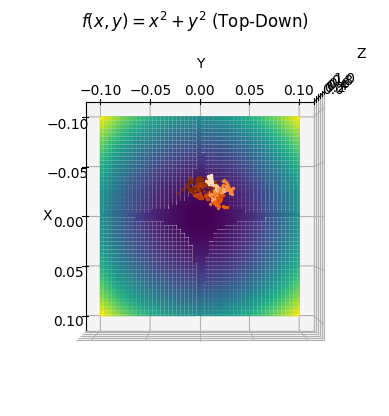

In [54]:
# Zoom in to final iterations
x = np.linspace(-0.1, 0.1, 100)
y = np.linspace(-0.1, 0.1, 100)
x, y = np.meshgrid(x, y)
z = np.array([f(np.array([x[i, j], y[i, j]])) for i in range(x.shape[0]) for j in range(x.shape[1])])
z = z.reshape(x.shape)

# Plot f(x, y) = x^2 + y^2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis', zorder=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("$f(x, y) = x^2 + y^2$ (Top-Down)")

# Prepare final 400 guesses
points = guesses[-400:]
x_points = np.array([p[0] for p in points])
y_points = np.array([p[1] for p in points])
z_points = np.array([f(p) for p in points]) + 1
norm = plt.Normalize(0, len(points))

# Use a colormap to assign colors
cmap = cm.get_cmap('Oranges_r')

# Plot the specific points as dots with a gradient color
for i in range(len(points)):
    color = cmap(norm(i))
    ax.scatter(x_points[i], y_points[i], z_points[i], color=color, s=2, zorder=2)

ax.view_init(elev=90, azim=0)
plt.show()


The estimate does indeed improve as iterations increase, but not always linearly. The final solution is not necesarilly the best that has been found throughout the anneal, although it is still pretty good. Keep in mind that the above diagram is just the $0.2 \times 0.2$ box about the origin. Improvments could be made by running the anneal multiple times and taking the best solution. Further, we may wonder how the solution estimate varies with the cooling rate `alpha`. Above, a very slow cooling rate of `alpha` $=0.995$ has been used, but could it be that we could achieve the same results for a smaller `alpha`? (This would correspond to fewer iterations). Below we can see an improvement as it increases (slower cooling), with a leveling out seeming to occur at `alpha`$=0.95$. We run the annealer at each value between $0.8$ and $0.99$ at steps of $0.05$ for $20$ iterations and take the best estimate. 

Text(0.5, 1.0, '$f$ Evaluated at Best Found Solution for Each alpha')

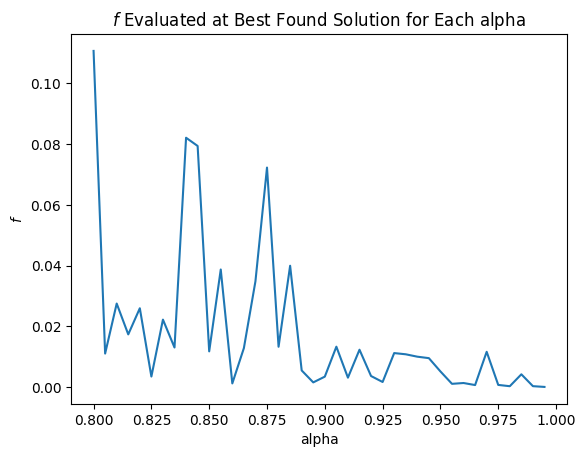

In [12]:
estimates = []
for i in range(40):
    ann = Annealer(alpha = 0.8 + i * 0.005)
    Es = []
    for j in range(20):
        solution, guesses, energies = ann.anneal(f, np.array([-1, 3]))
        Es.append(energies[-1])
    estimates.append(sorted(Es)[0])

plt.plot([0.8 + i * 0.005 for i in range(40)], estimates)
plt.xlabel("alpha")
plt.ylabel("$f$")
plt.title("$f$ Evaluated at Best Found Solution for Each alpha")

We will now run the anneal for a few different values of `alpha`, multiple times each and see if we can get a better estimate.

In [22]:
alphas = np.linspace(0.9, 0.999, 20)
best_guesses = []
for a in alphas:
    ann = Annealer(alpha=a)
    xs = []
    for i in range(30):
        solution, guesses, energies = ann.anneal(f, np.random.randn(2))
        xs.append(solution)
    best_guesses.append(min(xs, key=f))

/var/folders/8n/1lsng3052fb68wxmq2r34tw80000gn/T/ipykernel_79020/2232142616.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Oranges_r')


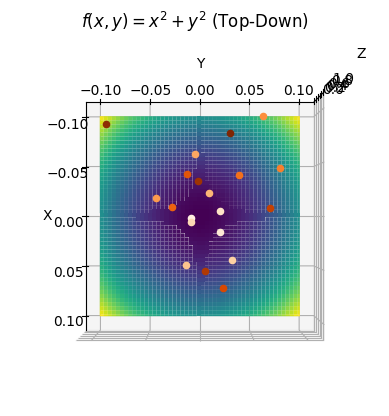

In [27]:
x = np.linspace(-0.1, 0.1, 100)
y = np.linspace(-0.1, 0.1, 100)
x, y = np.meshgrid(x, y)
z = np.array([f(np.array([x[i, j], y[i, j]])) for i in range(x.shape[0]) for j in range(x.shape[1])])
z = z.reshape(x.shape)

# Plot f(x, y) = x^2 + y^2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis', zorder=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("$f(x, y) = x^2 + y^2$ (Top-Down)")

x_points = np.array([p[0] for p in best_guesses])
y_points = np.array([p[1] for p in best_guesses])
z_points = np.array([f(p) for p in best_guesses]) + 1
norm = plt.Normalize(0, len(best_guesses))

# Use a colormap to assign colors
cmap = cm.get_cmap('Oranges_r')

# Plot the specific points as dots with a gradient color
for i in range(len(best_guesses)):
    color = cmap(norm(i))
    ax.scatter(x_points[i], y_points[i], z_points[i], color=color, s=20, zorder=2)

ax.view_init(elev=90, azim=0)
plt.show()

Now, we can see above that those points calculated for higher `alpha` (lighter in colour) appear to be closer to the minimum located at the centre of the plot.

## Annealing for a Discrete Problem

Annealing for disctete problems can be seen in the notebooks `MaxCut.ipynb` and `PortfolioOptimisation.ipynb`.